In [154]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
df = pd.read_csv("new_df_cleaned copy.csv")
df

,brand_name,parent_company_name,submission_id,year,item_description,type_product,type_material,layer,organization,volunteer,...,time_spent,city,province,event_total_count,event_id,longitude_most_specific,latitude_most_specific,location_specificity,total_count,proportion
0,1 oz lead weights removed from cast net,unbranded,172,2018,NaN,other,Other,unsure,377,1,...,2.23,wakulla county,FL,339,Excel Template Old_172_2018,-100.45,39.78,state,64,0.188791
1,1/2 styrofoam car inner bumper,unbranded,172,2018,NaN,other,Polystyrene,unsure,377,1,...,2.23,wakulla county,FL,339,Excel Template Old_172_2018,-100.45,39.78,state,1,0.002950
2,12 oz bottles,unbranded,172,2018,NaN,other,Polyethylene Terephthalate,unsure,377,1,...,2.23,wakulla county,FL,339,Excel Template Old_172_2018,-100.45,39.78,state,3,0.008850
3,12 oz brown beer bottles,unbranded,172,2018,NaN,other,Other,unsure,377,1,...,2.23,wakulla county,FL,339,Excel Template Old_172_2018,-100.45,39.78,state,17,0.050147
4,16 oz bottles,unbranded,172,2018,NaN,other,Polyethylene Terephthalate,unsure,377,1,...,2.23,wakulla county,FL,339,Excel Template Old_172_2018,-100.45,39.78,state,12,0.035398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,ziploc,s. c. johnson & son,319,2021,sandwich bag,household products,Other,unsure,50,62,...,3.50,fairhaven,MA,1858,Excel Template 2021_319_2021,-70.90,41.64,city,2,0.001076
1933,ziploc,s. c. johnson & son,158,2018,NaN,other,Other,unsure,156,25,...,2.23,st.petersburg,FL,466,Excel Template Old_158_2018,-100.45,39.78,state,2,0.004292
1934,ziploc,s. c. johnson & son,169,2018,NaN,other,Other,unsure,234,25,...,2.23,san diego,CA,130,Excel Template Old_169_2018,-117.16,32.72,city,4,0.030769
1935,ziploc,s. c. johnson & son,226,2018,NaN,other,Other,unsure,234,30,...,2.23,long beach,CA,236,Excel Template Old_226_2018,-118.19,33.77,city,1,0.004237


In [138]:
unique_event_ids = df['event_id'].nunique()
print("Number of unique event_id: ", unique_event_ids)

Number of unique event_id:  93


In [139]:
unique_organization_ids = df['organization'].nunique()
print("Number of unique organization_id: ", unique_organization_ids)

Number of unique organization_id:  48


In [140]:
df_grouped = df.groupby('parent_company_name')['total_count'].sum().reset_index().sort_values(by='total_count', ascending=False)
print("Top parent companies by count", df_grouped.head(10))

Top parent companies by count          parent_company_name  total_count
63                 unbranded        21821
43                   pepsico          926
40                    nestlé          801
61     the coca-cola company          540
2                     altria          524
3       anheuser-busch inbev          291
33        mars, incorporated          285
14                    costco          217
58                 starbucks          162
11  british american tobacco          148


In [92]:
df_grouped = df.groupby('organization')['event_id'].nunique().reset_index().sort_values(by='event_id', ascending=False)
df_grouped.head(10)

,organization,event_id
39,497,16
45,585,8
18,258,6
37,483,4
31,393,4
16,234,3
29,391,2
23,315,2
20,272,2
36,457,2


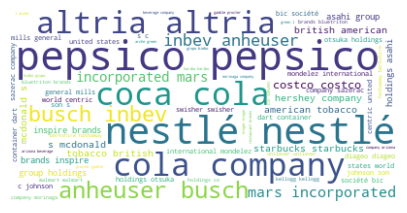

In [141]:
# Word cloud replace unbranded and unknown with '' and times total count

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert all the values in 'item_description' column to strings
df['parent_company_name'] = df['parent_company_name'].astype(str)

# Preprocess the data (make it lowercase and remove extra whitespace)
df['parent_company_name'] = df['parent_company_name'].str.lower().str.strip()

# Replace 'nan' strings (which are the string representation of NaN values) with empty strings
df['parent_company_name'] = df['parent_company_name'].replace('unbranded', '')

# Create new dataframe where each row is duplicated according to 'total_count'
df_duplicated = df.loc[df.index.repeat(df['total_count'])]

# Join all the descriptions into a single string
item_descriptions = ' '.join(df_duplicated['parent_company_name'])

# Generate the word cloud
wordcloud = WordCloud(background_color='white', max_words=100, contour_color='black').generate(item_descriptions)

# Display the generated image
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


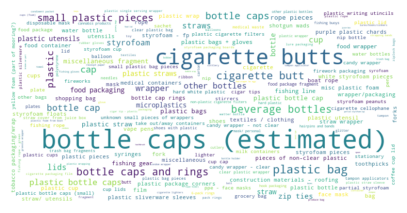

In [155]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Filter the dataframe
df_unbranded = df[df['parent_company_name'] == 'unbranded']

# Remove rows with missing values in 'item_description'
df_unbranded = df_unbranded.dropna(subset=['item_description'])

# Initialize an empty Counter object to store the total counts of each item
total_counts = Counter()

# Iterate over each row in the DataFrame
for _, row in df_unbranded.iterrows():
    # Each description is a string like "water, 2\nplastic, 4", and we want to split this into a list of (item, count) pairs
    item_counts = [item.split(', ') for item in row['item_description'].split('\n')]
    # Now, item_counts might look something like [['water', '2'], ['plastic', '4']]
    
    # We want to convert the counts from strings to integers, and multiply by the 'total_count' for the row
    item_counts = {item[0]: int(item[1]) * row['total_count'] if len(item) > 1 and item[1].isdigit() else row['total_count'] for item in item_counts if item and item[0]}
    
    # Then we add these counts to our total_counts Counter object
    total_counts.update(item_counts)

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(total_counts)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png', bbox_inches='tight', dpi=900)
plt.show()


In [143]:
# Table for city and unique event count 

# First, we will drop the duplicate entries in the dataframe for each city and event_id
df_unique = df.drop_duplicates(subset=['city', 'event_id'])

# Next, we will group by 'city' and count unique 'event_id'
result = df_unique.groupby('city')['event_id'].count().reset_index()

# Rename the 'event_id' column to 'unique_event_count'
result.rename(columns={'event_id': 'unique_event_count'}, inplace=True)

# Sort by 'unique_event_count' in descending order
result = result.sort_values('unique_event_count', ascending=False)

# Display the dataframe
print(result)


                                              city  unique_event_count
23                                       milwaukee                  10
19                                     los angeles                   8
35                                   san francisco                   6
41                                   st.petersburg                   6
18                                      long beach                   4
16                                            kona                   3
34                                       san diego                   3
21                                           miami                   3
11                                       fairhaven                   2
30                                     point reyes                   2
20                                          malibu                   2
0                                           albany                   2
10                                   crescent city                   2
5     

In [144]:
# Table for province and unique event count

# First, we will drop the duplicate entries in the dataframe for each city and event_id
df_unique = df.drop_duplicates(subset=['province', 'event_id'])

# Next, we will group by 'city' and count unique 'event_id'
result = df_unique.groupby('province')['event_id'].count().reset_index()

# Rename the 'event_id' column to 'unique_event_count'
result.rename(columns={'event_id': 'unique_event_count'}, inplace=True)

# Sort by 'unique_event_count' in descending order
result = result.sort_values('unique_event_count', ascending=False)

# Display the dataframe
print(result)


   province  unique_event_count
1        CA                  47
3        FL                  11
16       WI                  10
11       NY                   4
15       WA                   4
5        HI                   3
7        MA                   3
12       OR                   2
14     USVI                   1
13       TX                   1
0        AK                   1
10       NC                   1
9        MS                   1
6        IL                   1
4        GA                   1
2        DC                   1
8        ME                   1


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import itertools

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

df = df[['year', 'type_product', 'type_material', 'layer', 'city', 'province']] # select columns

corrM = np.zeros((df.shape[1],df.shape[1]))

# Calculate Cramers V statistic for every pair of columns in the dataframe
for col1, col2 in itertools.combinations(df, 2):
    idx1, idx2 = df.columns.get_loc(col1), df.columns.get_loc(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=df.columns, columns=df.columns)

print(corr)

                   year  type_product  type_material     layer      city  \
year           0.000000      0.382178       0.161763  0.564264  0.740382   
type_product   0.382178      0.000000       0.207901  0.429576  0.332259   
type_material  0.161763      0.207901       0.000000  0.265813  0.248403   
layer          0.564264      0.429576       0.265813  0.000000  0.558221   
city           0.740382      0.332259       0.248403  0.558221  0.000000   
province       0.475361      0.258027       0.198807  0.390463  0.991106   

               province  
year           0.475361  
type_product   0.258027  
type_material  0.198807  
layer          0.390463  
city           0.991106  
province       0.000000  


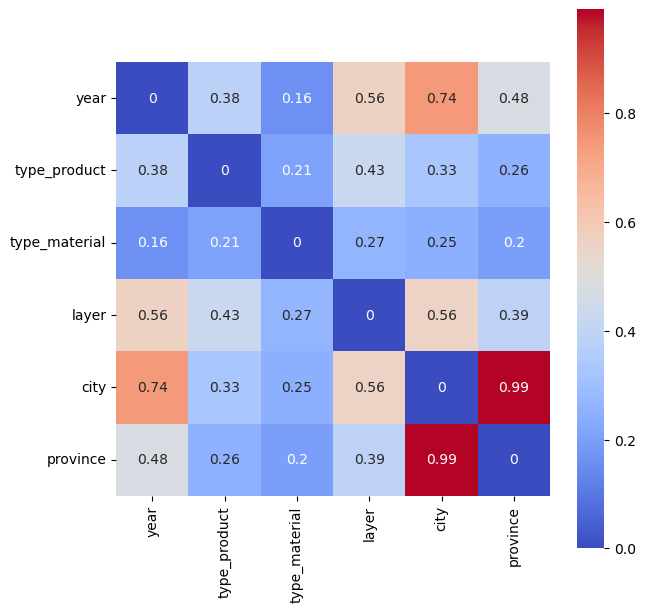

In [54]:
# Plot the correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.show()

# Save the figure remove hashtag
# plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')


In [156]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define our features and target
features = df[['year', 'type_product', 'type_material', 'city', 'province']]
target = df['layer']

# Create one-hot encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the features
features_encoded = encoder.fit_transform(features)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Print the classification report
print(classification_report(y_test, y_pred))


/Users/tuh42450/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

 multi-layer       0.81      0.51      0.62        85
single-layer       0.70      0.87      0.78       129
      unsure       0.91      0.93      0.92       174

    accuracy                           0.81       388
   macro avg       0.81      0.77      0.77       388
weighted avg       0.82      0.81      0.81       388



/Users/tuh42450/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

 multi-layer       0.81      0.51      0.62        85
single-layer       0.70      0.87      0.78       129
      unsure       0.91      0.93      0.92       174

    accuracy                           0.81       388
   macro avg       0.81      0.77      0.77       388
weighted avg       0.82      0.81      0.81       388



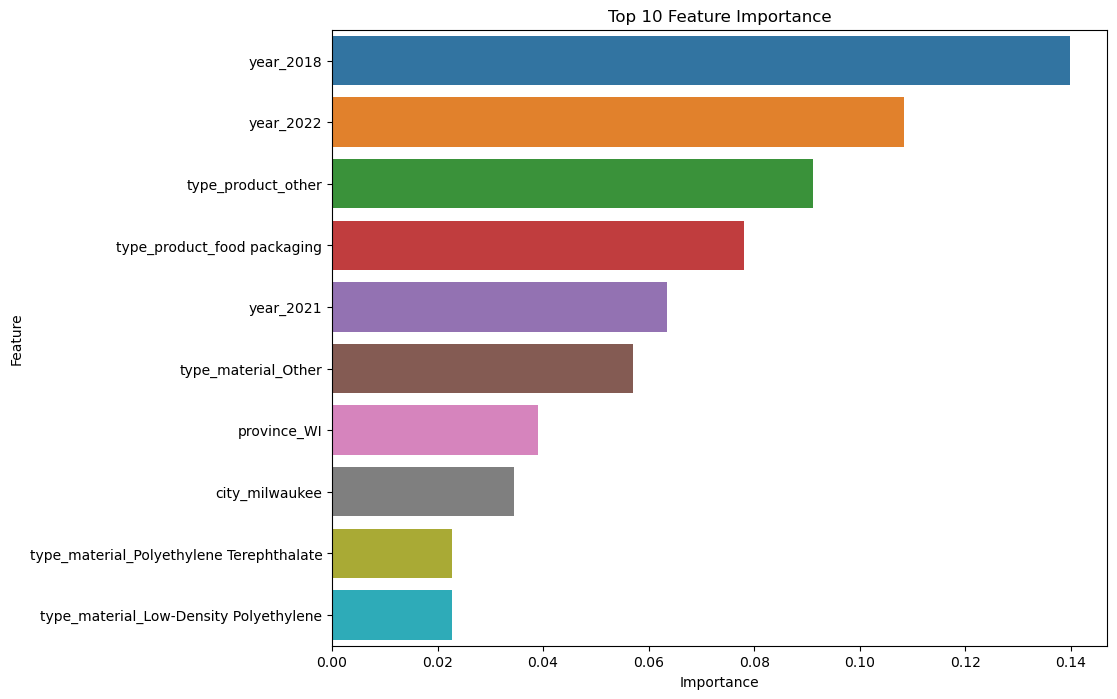

In [159]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define our features and target
features = df[['year', 'type_product', 'type_material', 'city', 'province']]
target = df['layer']

# Create one-hot encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the features
features_encoded = encoder.fit_transform(features)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Train the model and get the feature importances
clf.fit(X_train, y_train)
importances = clf.feature_importances_

# Get feature names from the OneHotEncoder
feature_names = encoder.get_feature_names_out(features.columns)

# Create a DataFrame that connects each feature name to its importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order and take the top 10
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Top 10 Feature Importance')
plt.show()


In [104]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE  # import the SMOTE library

# Define our features and target
features = df[['year', 'type_product', 'type_material', 'city', 'province']]
target = df['layer']

# Create one-hot encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the features
features_encoded = encoder.fit_transform(features)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Use SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled data
clf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


/Users/tuh42450/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

 multi-layer       0.69      0.65      0.67        85
single-layer       0.73      0.77      0.75       129
      unsure       0.91      0.90      0.90       174

    accuracy                           0.80       388
   macro avg       0.78      0.77      0.77       388
weighted avg       0.80      0.80      0.80       388



/Users/tuh42450/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

 multi-layer       0.69      0.65      0.67        85
single-layer       0.73      0.77      0.75       129
      unsure       0.91      0.90      0.90       174

    accuracy                           0.80       388
   macro avg       0.78      0.77      0.77       388
weighted avg       0.80      0.80      0.80       388



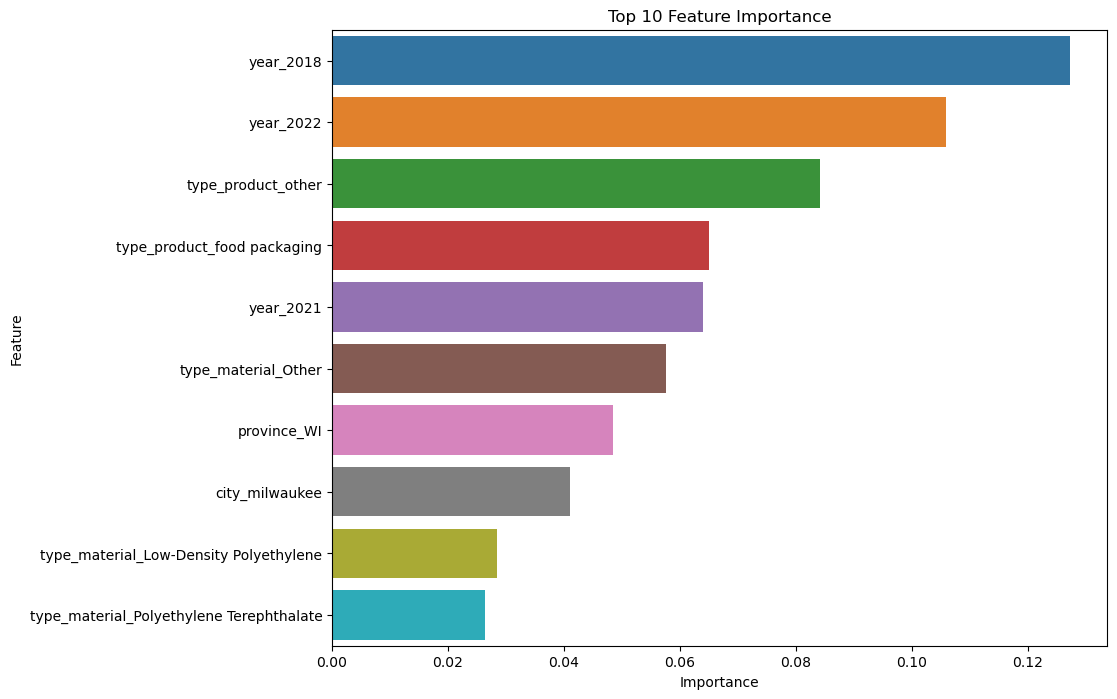

In [164]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE  # import the SMOTE library
import matplotlib.pyplot as plt
import seaborn as sns

# Define our features and target
features = df[['year', 'type_product', 'type_material', 'city', 'province']]
target = df['layer']

# Create one-hot encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the features
features_encoded = encoder.fit_transform(features)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Use SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled data
clf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Get the feature importances
importances = clf.feature_importances_

# Get feature names from the OneHotEncoder
feature_names = encoder.get_feature_names_out(features.columns)

# Create a DataFrame that connects each feature name to its importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order and take the top 10
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting the feature importances
plt.figure(figsize=(10,8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Top 10 Feature Importance')
plt.savefig('feature_importance.png', bbox_inches='tight', dpi=300)
plt.show()
